In [207]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as trade_api
import json
from datetime import datetime
from alpaca_trade_api.rest import REST, TimeFrame
from MCForecastTools import MCSimulation

In [208]:
# Load .env enviroment variables

load_dotenv()

True

In [209]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [210]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [211]:
response_btc = requests.get(btc_url).json()
print(json.dumps(response_btc, indent=8))

{
        "data": {
                "1": {
                        "id": 1,
                        "name": "Bitcoin",
                        "symbol": "BTC",
                        "website_slug": "bitcoin",
                        "rank": 1,
                        "circulating_supply": 18992993,
                        "total_supply": 18992993,
                        "max_supply": 21000000,
                        "quotes": {
                                "USD": {
                                        "price": 44137.0,
                                        "volume_24h": 25339168398,
                                        "market_cap": 838714845964,
                                        "percentage_change_1h": 0.48925252590309,
                                        "percentage_change_24h": 3.125707471879,
                                        "percentage_change_7d": 7.64603069376131,
                                        "percent_change_1h": 0.48925252590309,
      

In [212]:
# Fetch current BTC price

price_btc = response_btc["data"]['1']['quotes']['CAD']['price']
print(price_btc)

55286.0062


In [213]:
response_eth = requests.get(eth_url).json()
print(json.dumps(response_eth, indent=8))

{
        "data": {
                "1027": {
                        "id": 1027,
                        "name": "Ethereum",
                        "symbol": "ETH",
                        "website_slug": "ethereum",
                        "rank": 2,
                        "circulating_supply": 120098994,
                        "total_supply": 120098994,
                        "max_supply": 0,
                        "quotes": {
                                "USD": {
                                        "price": 3124.3,
                                        "volume_24h": 15024941252,
                                        "market_cap": 375061228008,
                                        "percentage_change_1h": 0.694228624955641,
                                        "percentage_change_24h": 3.28480092481895,
                                        "percentage_change_7d": 10.8929249557252,
                                        "percent_change_1h": 0.694228624955641,


In [214]:
# Fetch current ETH price

price_eth = response_eth["data"]['1027']['quotes']['CAD']['price']
print(price_eth)

3913.49818


In [215]:
# Compute current value of my crypto

my_btc_value = price_btc * my_btc
my_eth_value = price_eth * my_eth

total_crypto_value = my_btc_value + my_eth_value

In [216]:
# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your crypto is ${total_crypto_value:0.2f}")

The current value of your 1.2 BTC is $66343.21
The current value of your 5.3 ETH is $20741.54
The current value of your crypto is $87084.75


In [217]:
# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

# Set current amount of shares
my_agg = 200
my_spy = 50

In [218]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv('ALPACA_API_KEY')
# alpaca_api_key
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# alpaca_secret_key

In [219]:
# Create the Alpaca API object

alpaca=trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [220]:
# Set the tickers

tickers = ['AGG','SPY']

In [221]:
today = "2022-03-21"
alpaca_df = alpaca.get_bars(tickers, TimeFrame.Day, today, today, adjustment='raw').df
alpaca_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-21 04:00:00+00:00,107.58,107.649,106.9841,107.04,7583668,27316,107.310151,AGG
2022-03-21 04:00:00+00:00,444.45,446.460,440.6800,444.30,85377983,912432,443.796432,SPY


In [222]:
# Pick AGG and SPY close prices

agg_close_price = alpaca_df.iloc[0, 3]
spy_close_price = alpaca_df.iloc[1, 3]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.3


In [223]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
total_shares_value = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your shares is ${total_shares_value:0.2f}")


The current value of your 200 AGG shares is $21408.00
The current value of your 50 SPY shares is $22215.00
The current value of your shares is $43623.00


In [224]:
# Savings Health Analysis

# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
d = {'amount': [total_crypto_value, total_shares_value]}
df_savings = pd.DataFrame(data=d, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,87084.747794
shares,43623.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

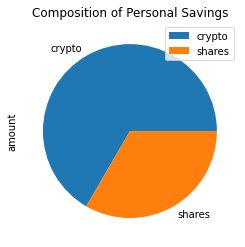

In [225]:
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [226]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = monthly_income + total_crypto_value + total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings} short of achieving your financial goal")

Congratulations! You have enough money in your emergency fund.


In [227]:
## Part 2 - Retirement Planning

# Monte Carlo Simulation

In [228]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2017-03-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-01', tz='America/New_York').isoformat()

In [229]:
# Get 5 years' worth of historical data for AGG

df_stock_data_agg = alpaca.get_bars(tickers[0], TimeFrame.Day, start_date, end_date, adjustment='raw').df
df_stock_data_agg.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-03-01 05:00:00+00:00,108.13,108.1369,107.9800,108.04,3280167,13692,108.052477
2017-03-02 05:00:00+00:00,107.93,107.9900,107.7513,107.84,2299703,10821,107.843015
2017-03-03 05:00:00+00:00,107.92,107.9700,107.7400,107.92,4293867,17373,107.883517
2017-03-06 05:00:00+00:00,107.94,107.9900,107.8200,107.87,3678302,13782,107.880650
2017-03-07 05:00:00+00:00,107.80,107.8400,107.6900,107.73,2237937,9271,107.742308


In [230]:
# Get 5 years' worth of historical data for SPY

df_stock_data_spy = alpaca.get_bars(tickers[1], TimeFrame.Day, start_date, end_date, adjustment='raw').df
df_stock_data_spy.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-03-01 05:00:00+00:00,238.40,240.32,238.37,239.78,149158170,344253,238.913316
2017-03-02 05:00:00+00:00,239.57,239.57,238.21,238.27,70245978,246411,238.809756
2017-03-03 05:00:00+00:00,238.19,238.61,237.73,238.42,81974300,211686,238.302476
2017-03-06 05:00:00+00:00,237.48,238.12,237.01,237.71,55391533,181334,237.695276
2017-03-07 05:00:00+00:00,237.39,237.77,236.76,237.00,65103737,188508,237.236180


In [231]:
df_stock_data_agg.index = df_stock_data_agg.index.date
df_stock_data_agg=df_stock_data_agg[['close']]
df_stock_data_agg

,close
2017-03-01,108.04
2017-03-02,107.84
2017-03-03,107.92
2017-03-06,107.87
2017-03-07,107.73
...,...
2022-02-23,109.26
2022-02-24,109.46
2022-02-25,109.57
2022-02-28,110.36


In [232]:
df_stock_data_spy.index = df_stock_data_spy.index.date
df_stock_data_spy=df_stock_data_spy[['close']]
df_stock_data_spy

,close
2017-03-01,239.78
2017-03-02,238.27
2017-03-03,238.42
2017-03-06,237.71
2017-03-07,237.00
...,...
2022-02-23,422.07
2022-02-24,428.30
2022-02-25,437.75
2022-02-28,436.63


In [233]:
micolumns = pd.MultiIndex.from_tuples(
    [('AGG', "close")]
)

df_stock_data_agg.columns = micolumns
df_stock_data_agg

,AGG
,close
2017-03-01,108.04
2017-03-02,107.84
2017-03-03,107.92
2017-03-06,107.87
2017-03-07,107.73
...,...
2022-02-23,109.26
2022-02-24,109.46
2022-02-25,109.57


In [234]:
micolumns = pd.MultiIndex.from_tuples(
    [('SPY', "close")]
)

df_stock_data_spy.columns = micolumns
df_stock_data_spy

,SPY
,close
2017-03-01,239.78
2017-03-02,238.27
2017-03-03,238.42
2017-03-06,237.71
2017-03-07,237.00
...,...
2022-02-23,422.07
2022-02-24,428.30
2022-02-25,437.75


In [235]:
df_stock_data = pd.concat([df_stock_data_agg, df_stock_data_spy], axis = 1, join = "inner")
df_stock_data

,AGG,SPY
,close,close
2017-03-01,108.04,239.78
2017-03-02,107.84,238.27
2017-03-03,107.92,238.42
2017-03-06,107.87,237.71
2017-03-07,107.73,237.00
...,...,...
2022-02-23,109.26,422.07
2022-02-24,109.46,428.30
2022-02-25,109.57,437.75


In [236]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# tickers = ['AGG','SPY']

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [237]:
 # Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                  SPY             
             close daily_return   close daily_return
2017-03-01  108.04          NaN  239.78          NaN
2017-03-02  107.84    -0.001851  238.27    -0.006297
2017-03-03  107.92     0.000742  238.42     0.000630
2017-03-06  107.87    -0.000463  237.71    -0.002978
2017-03-07  107.73    -0.001298  237.00    -0.002987

In [238]:
MC_30year.portfolio_data.dropna(inplace=True)
MC_30year.portfolio_data

AGG                  SPY             
             close daily_return   close daily_return
2017-03-02  107.84    -0.001851  238.27    -0.006297
2017-03-03  107.92     0.000742  238.42     0.000630
2017-03-06  107.87    -0.000463  237.71    -0.002978
2017-03-07  107.73    -0.001298  237.00    -0.002987
2017-03-08  107.47    -0.002413  236.56    -0.001857
...            ...          ...     ...          ...
2022-02-23  109.26    -0.004465  422.07    -0.017459
2022-02-24  109.46     0.001830  428.30     0.014761
2022-02-25  109.57     0.001005  437.75     0.022064
2022-02-28  110.36     0.007210  436.63    -0.002559
2022-03-01  110.82     0.004168  429.98    -0.015230

[1259 rows x 4 columns]

In [239]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nadeemh/Documents/Personal/UofT/Homework/05-APIs/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997147,1.002271,0.994518,0.996616,0.994982,0.987696,0.997159,0.999636,1.001993,0.994021,...,0.992264,0.991460,1.000675,1.001718,1.003764,0.996966,1.002216,0.992831,1.001136,1.006373
2,0.993266,0.994806,0.992425,0.998724,1.002605,0.992744,0.997028,0.991395,1.004236,0.995668,...,0.987837,0.992618,1.003637,1.006983,0.993943,0.993293,0.989689,0.989897,1.007723,1.019315
3,0.991868,0.993354,0.991443,0.989017,0.998052,0.983751,1.005375,0.994425,1.001026,0.984817,...,0.978270,0.992041,0.995954,0.997102,0.998353,0.991799,0.993434,0.982113,1.011097,1.013108
4,0.994168,0.992505,0.990139,0.989909,0.997290,0.983459,0.999858,0.992083,0.997585,0.985622,...,0.966353,0.988976,0.987990,1.003355,0.989488,0.997350,0.996599,0.971259,1.032705,1.020402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.641715,12.789987,15.919790,8.070524,26.930610,5.861828,23.049620,11.543411,18.873673,6.977626,...,12.450823,14.026203,10.187986,9.254742,11.198700,19.902501,7.115378,7.283295,29.044055,12.693881
7557,22.643655,12.806360,15.722305,8.151142,26.614782,5.795294,23.031378,11.594334,18.814109,6.982002,...,12.406099,13.827307,10.135063,9.301925,11.233836,19.879402,7.142086,7.319297,29.062524,12.567394
7558,22.922885,12.927651,15.869821,8.122361,26.697840,5.793739,22.938871,11.647780,18.822542,6.986576,...,12.351882,13.746363,10.032950,9.389989,11.285335,19.777487,7.070018,7.294558,29.028159,12.623592
7559,23.046055,12.824216,15.934736,8.105762,26.417385,5.845618,23.038121,11.911753,18.898616,6.975344,...,12.351553,13.782131,10.010950,9.399958,11.468156,20.056818,7.061225,7.257038,28.844764,12.804374


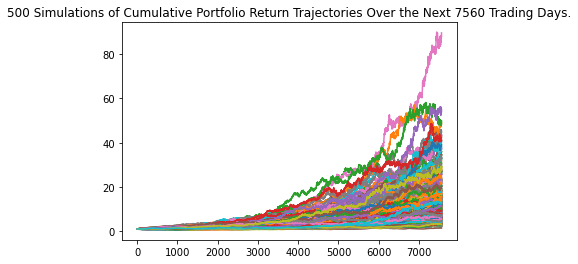

In [240]:
# Plot simulation outcomes

line_plot = MC_30year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

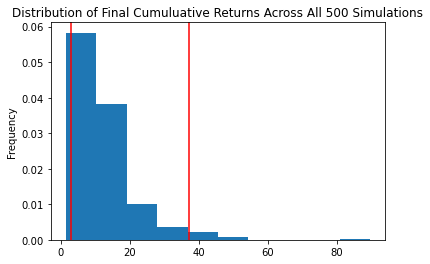

In [241]:
# Plot probability distribution and confidence intervals

dist_plot = MC_30year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')


In [242]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.325546
std               9.106250
min               1.423942
25%               6.457915
50%              10.022316
75%              15.200677
max              89.614171
95% CI Lower      2.979749
95% CI Upper     37.149155
Name: 7560, dtype: float64


In [243]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl.iloc[-2] * initial_investment, 2)
ci_upper = round(tbl.iloc[-1] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.0f} in the portfolio"
      f" over the next 30 years will end in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end in the range of $59,594.98 and $742,983.10


In [244]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl.iloc[-2] * initial_investment, 2)
ci_upper = round(tbl.iloc[-1] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.0f} in the portfolio"
      f" over the next 30 years will end in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 30 years will end in the range of $89,392.47 and $1,114,474.66


In [245]:
# Optional Challenge - Early Retirement
# Five Years Retirement Option

# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [246]:
 # Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AGG                  SPY             
             close daily_return   close daily_return
2017-03-01  108.04          NaN  239.78          NaN
2017-03-02  107.84    -0.001851  238.27    -0.006297
2017-03-03  107.92     0.000742  238.42     0.000630
2017-03-06  107.87    -0.000463  237.71    -0.002978
2017-03-07  107.73    -0.001298  237.00    -0.002987

In [247]:
MC_fiveyear.portfolio_data.dropna(inplace=True)
MC_fiveyear.portfolio_data

AGG                  SPY             
             close daily_return   close daily_return
2017-03-02  107.84    -0.001851  238.27    -0.006297
2017-03-03  107.92     0.000742  238.42     0.000630
2017-03-06  107.87    -0.000463  237.71    -0.002978
2017-03-07  107.73    -0.001298  237.00    -0.002987
2017-03-08  107.47    -0.002413  236.56    -0.001857
...            ...          ...     ...          ...
2022-02-23  109.26    -0.004465  422.07    -0.017459
2022-02-24  109.46     0.001830  428.30     0.014761
2022-02-25  109.57     0.001005  437.75     0.022064
2022-02-28  110.36     0.007210  436.63    -0.002559
2022-03-01  110.82     0.004168  429.98    -0.015230

[1259 rows x 4 columns]

In [248]:
# Running a Monte Carlo simulation to forecast five years cumulative returns

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nadeemh/Documents/Personal/UofT/Homework/05-APIs/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996812,1.006379,1.001437,0.999375,1.008011,1.017141,0.993214,0.983283,0.995435,1.004306,...,0.997241,0.998844,1.013222,1.013701,0.998036,1.007650,1.004911,0.989194,1.005967,1.000298
2,0.993258,1.007157,1.002286,0.996802,1.015889,1.015128,0.978718,0.981514,0.996477,1.003084,...,1.003538,1.006012,1.008480,1.021721,1.005949,1.002405,1.006942,0.984720,1.003890,1.002446
3,1.001412,1.004216,0.993331,1.002568,1.022428,1.018439,0.984867,0.978569,0.992065,1.008726,...,1.009029,1.003535,1.010703,1.020948,1.000400,0.996611,1.002114,0.984799,1.005743,1.002780
4,1.008003,0.999747,0.996248,0.998567,1.013874,1.015876,0.990041,0.984570,0.985856,0.999307,...,1.032818,1.003139,1.010928,1.013782,1.000983,1.006418,0.992688,0.984075,1.002533,1.008413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.324341,1.135134,1.350719,1.474140,2.023672,1.359061,1.843043,1.433146,0.755464,1.694694,...,2.122921,0.995045,0.948526,0.955366,1.685062,0.935490,1.749935,2.055332,1.507988,1.057953
1257,1.309747,1.128472,1.353356,1.476074,2.029021,1.357056,1.831038,1.446125,0.758200,1.689739,...,2.140684,0.991506,0.949746,0.960717,1.659245,0.942810,1.744714,2.046287,1.514662,1.061551
1258,1.294607,1.143546,1.352729,1.474356,2.035879,1.344110,1.857883,1.445795,0.750965,1.690199,...,2.166529,0.987281,0.943326,0.956530,1.643755,0.955611,1.747019,2.051680,1.499352,1.066235
1259,1.307817,1.153531,1.374049,1.508682,2.040638,1.333646,1.876581,1.437304,0.749978,1.662853,...,2.166628,0.991436,0.931236,0.961652,1.639319,0.962155,1.739556,2.049311,1.510301,1.064342


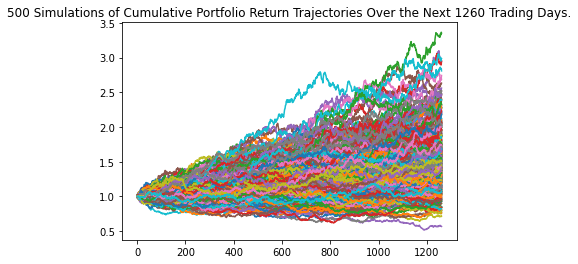

In [249]:
# Plot simulation outcomes

line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_05year_sim_plot.png", bbox_inches="tight")

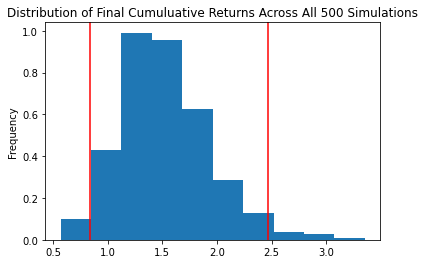

In [250]:
# Plot probability distribution and confidence intervals

dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_05year_dist_plot.png',bbox_inches='tight')

In [251]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.525751
std               0.407393
min               0.567517
25%               1.241106
50%               1.482692
75%               1.740059
max               3.354535
95% CI Lower      0.840902
95% CI Upper      2.470175
Name: 1260, dtype: float64


In [252]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $60,000 initial investment.

# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl.iloc[-2] * initial_investment, 2)
ci_upper_five = round(tbl.iloc[-1] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.0f} in the portfolio"
      f" over the next 30 years will end in the range of"
      f" ${ci_lower_five:0,.2f} and ${ci_upper_five:0,.2f}")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next 30 years will end in the range of $50,454.14 and $148,210.51


In [253]:
# Ten Years Retirement Option

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [254]:
 # Printing the simulation input data
MC_tenyear.portfolio_data.head()

AGG                  SPY             
             close daily_return   close daily_return
2017-03-01  108.04          NaN  239.78          NaN
2017-03-02  107.84    -0.001851  238.27    -0.006297
2017-03-03  107.92     0.000742  238.42     0.000630
2017-03-06  107.87    -0.000463  237.71    -0.002978
2017-03-07  107.73    -0.001298  237.00    -0.002987

In [255]:
MC_tenyear.portfolio_data.dropna(inplace=True)
MC_tenyear.portfolio_data

AGG                  SPY             
             close daily_return   close daily_return
2017-03-02  107.84    -0.001851  238.27    -0.006297
2017-03-03  107.92     0.000742  238.42     0.000630
2017-03-06  107.87    -0.000463  237.71    -0.002978
2017-03-07  107.73    -0.001298  237.00    -0.002987
2017-03-08  107.47    -0.002413  236.56    -0.001857
...            ...          ...     ...          ...
2022-02-23  109.26    -0.004465  422.07    -0.017459
2022-02-24  109.46     0.001830  428.30     0.014761
2022-02-25  109.57     0.001005  437.75     0.022064
2022-02-28  110.36     0.007210  436.63    -0.002559
2022-03-01  110.82     0.004168  429.98    -0.015230

[1259 rows x 4 columns]

In [256]:
# Running a Monte Carlo simulation to forecast ten years cumulative returns

MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nadeemh/Documents/Personal/UofT/Homework/05-APIs/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007887,1.012991,1.001732,0.988826,1.000657,1.001817,1.009142,1.010173,0.995605,0.997553,...,1.001571,1.009664,0.999587,0.998447,1.010185,1.000454,1.000306,0.999961,1.008382,1.000604
2,1.003198,0.995469,1.002028,0.988678,1.003533,1.017611,1.012620,1.015462,0.991390,0.998866,...,1.000550,1.003383,1.001254,1.001613,0.991108,0.994553,0.988608,1.000421,1.005129,1.007612
3,1.000381,1.002415,0.994903,0.978014,0.995776,1.017437,1.015267,1.021572,0.992757,0.989189,...,0.997014,0.994430,0.997421,0.995686,0.977749,0.997638,0.994340,1.008685,1.005733,1.006392
4,1.021638,0.990412,1.001431,0.978902,0.989079,1.016312,1.016525,1.035175,1.000534,0.983876,...,0.992984,1.001377,0.995689,0.988944,0.975700,0.985914,0.994560,1.003541,1.010283,1.007543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.717261,1.505160,2.822965,1.275985,2.665512,3.531440,1.388669,1.759910,3.216423,2.106358,...,2.096379,1.860320,1.969586,1.715620,3.910699,1.313847,1.185302,0.871869,2.082245,1.713424
2517,1.712162,1.508977,2.790580,1.250204,2.713313,3.546971,1.388843,1.763359,3.244570,2.117651,...,2.122241,1.870150,1.972201,1.723845,3.874156,1.327415,1.191116,0.865261,2.066332,1.715603
2518,1.716850,1.500007,2.764154,1.264871,2.672736,3.552884,1.387788,1.780607,3.262587,2.108730,...,2.162414,1.861657,2.000898,1.731588,3.870439,1.316071,1.180059,0.850862,2.075054,1.720360
2519,1.711506,1.493676,2.758451,1.285329,2.674372,3.582670,1.386075,1.780089,3.283414,2.116495,...,2.175917,1.899782,1.985071,1.738581,3.850251,1.311331,1.195415,0.843058,2.067237,1.719017


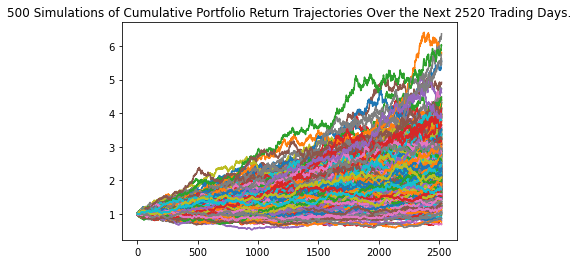

In [257]:
# Plot simulation outcomes

line_plot = MC_tenyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

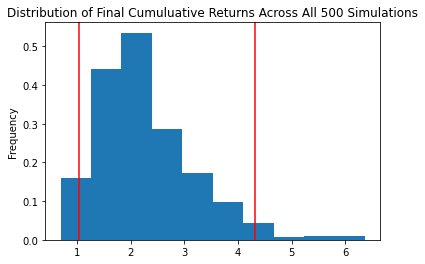

In [258]:
# Plot probability distribution and confidence intervals

dist_plot = MC_tenyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [259]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.296257
std               0.899082
min               0.689062
25%               1.652189
50%               2.124885
75%               2.806354
max               6.365366
95% CI Lower      1.031837
95% CI Upper      4.315723
Name: 2520, dtype: float64


In [260]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $60,000 initial investment.

# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl.iloc[-2] * initial_investment, 2)
ci_upper_ten = round(tbl.iloc[-1] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.0f} in the portfolio"
      f" over the next 30 years will end in the range of"
      f" ${ci_lower_ten:0,.2f} and ${ci_upper_ten:0,.2f}")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next 30 years will end in the range of $61,910.22 and $258,943.38
